In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
transfer_df = pd.read_csv('created/final_dataset.csv')
transfer_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Name', 'Position',
       'Age', 'Team_from', 'League_from', 'Team_to', 'League_to', 'Season',
       'Market_value', 'Transfer_fee', 'check_column', 'Country Column',
       'Nationality'],
      dtype='object')

In [39]:
mean_season_prices = []
for season, df in transfer_df.groupby("Season"):
    mean_season_prices.append(df["Transfer_fee"].mean())

In [14]:
len_mean_season_prices = len(mean_season_prices)
len_mean_season_prices

19

In [13]:
for season, df in transfer_df.groupby("Season"):
    print(season)

2000-2001
2001-2002
2002-2003
2003-2004
2004-2005
2005-2006
2006-2007
2007-2008
2008-2009
2009-2010
2010-2011
2011-2012
2012-2013
2013-2014
2014-2015
2015-2016
2016-2017
2017-2018
2018-2019


In [16]:
inflation_x_axis = np.linspace(1, len_mean_season_prices, len_mean_season_prices)
inflation_x_axis

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [21]:
inflation_full_df = pd.read_csv("data/inflation_index.csv")
inflation_full_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [22]:
req_row = inflation_full_df.loc[inflation_full_df["Country Name"] == "European Union"]
req_row = req_row[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

In [30]:
we_get = req_row.T
inflation_y_axis = we_get[73].tolist()
inflation_y_axis

[3.15076707022592,
 3.37396699038281,
 2.42443661219694,
 2.09199838997658,
 2.28621706801675,
 2.48769665164086,
 2.66631494577072,
 2.51066565240339,
 4.1649719352477,
 0.83926224679384,
 1.53112270420924,
 3.28944939564212,
 2.66284165508017,
 1.21999342274305,
 0.199343826570849,
 -0.0616446800641176,
 0.183334861123848,
 1.42910743319297,
 1.73860861988181]

Please change the scaling so the difference is noticable.

In [40]:
mean_season_prices = np.array(mean_season_prices)
mean_season_prices = mean_season_prices/5000000

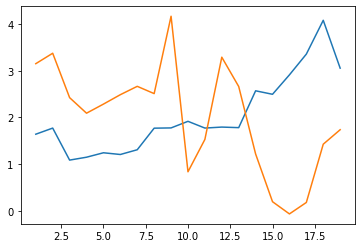

In [41]:
plt.plot(inflation_x_axis, mean_season_prices, label = "transfer fee")
plt.plot(inflation_x_axis, inflation_y_axis, label = "inflation in the EU")

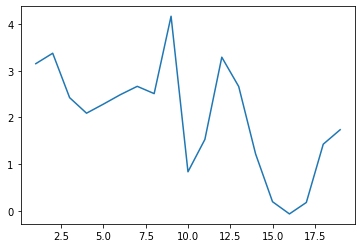

In [31]:
plt.plot(inflation_x_axis, inflation_y_axis, label = "inflation in the EU")

In [7]:
transfer_df["Transfer_fee"].mean()

10356150.888358526

In [34]:
from datetime import datetime

datetime_object = datetime.strptime('2006-07-09', '%Y-%m-%d')
year = datetime_object.strftime("%Y-%m-%d")
year

'2006-07-09'

Onto creating a list with indexed metrics for positions.

In [42]:
transfer_df["Nationality"].isnull().sum().sum()

522

In [43]:
import seaborn as sb

In [85]:
related_facts_df = transfer_df[["Name","Age", "Position","Transfer_fee", "Country Column", "Nationality"]]
related_facts_df.corr()

,Age,Transfer_fee
Age,1.00000,0.00579
Transfer_fee,0.00579,1.00000


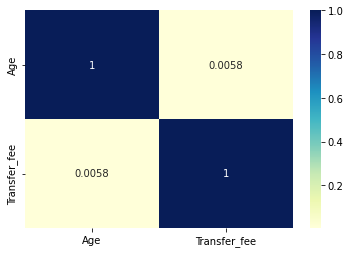

In [68]:
dataplot = sb.heatmap(related_facts_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [69]:
related_facts_df["Country Column"].unique()

array(['Spain', 'Italy', 'France', 'England', 'Scotland', nan, 'Germany',
       'Netherlands', 'Portugal', 'Greece', 'Belgium'], dtype=object)

In [70]:
len(related_facts_df)

3771

In [71]:
temp_df = related_facts_df.dropna(subset=["Country Column"])

In [72]:
len(temp_df.dropna(subset=["Nationality"]))

2559

In [73]:
temp_df["Position"].unique()

array(['Right Winger', 'Centre-Forward', 'Left Winger', 'Centre-Back',
       'Central Midfield', 'Attacking Midfield', 'Defensive Midfield',
       'Second Striker', 'Goalkeeper', 'Right-Back', 'Left Midfield',
       'Left-Back', 'Right Midfield', 'Forward', 'Defender'], dtype=object)

In [74]:
position_dict = {}
for position, df in temp_df.groupby("Position"):
    position_dict[position] = df["Transfer_fee"].mean()
position_dict

{'Attacking Midfield': 11337224.669603525,
 'Central Midfield': 10453242.424242424,
 'Centre-Back': 8988173.076923076,
 'Centre-Forward': 10752584.57374831,
 'Defender': 2000000.0,
 'Defensive Midfield': 9010334.572490707,
 'Forward': 2200000.0,
 'Goalkeeper': 8702786.885245902,
 'Left Midfield': 6451551.724137931,
 'Left Winger': 12180363.636363637,
 'Left-Back': 8812038.216560509,
 'Right Midfield': 6633333.333333333,
 'Right Winger': 13044775.280898876,
 'Right-Back': 8634344.262295082,
 'Second Striker': 9698720.930232558}

<BarContainer object of 15 artists>

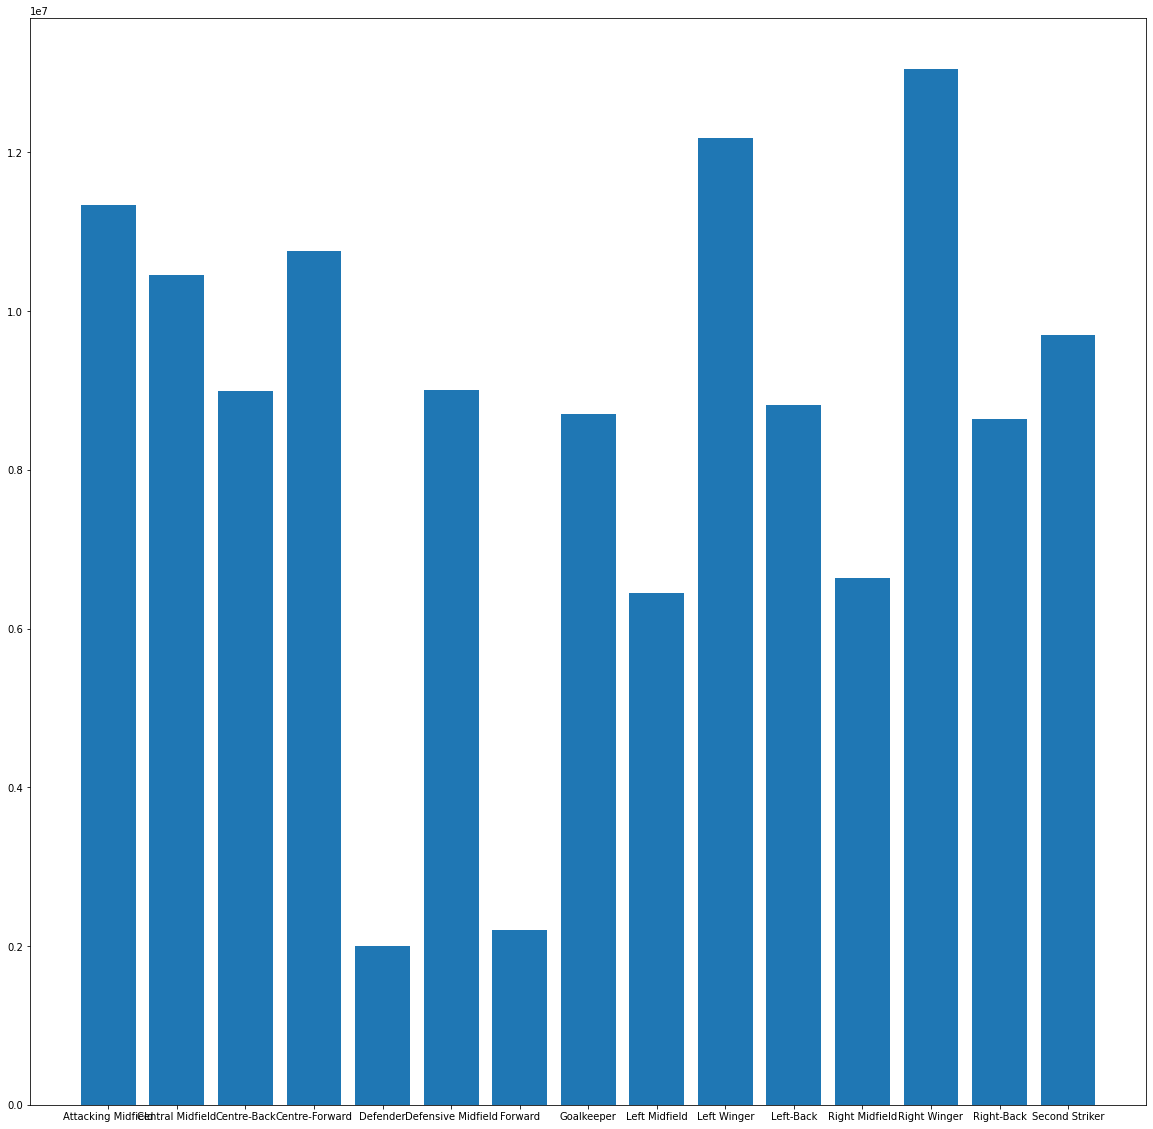

In [75]:
plt.figure(figsize=(20,20))
plt.bar(range(len(position_dict)), list(position_dict.values()), tick_label=list(position_dict.keys()))

In [76]:
age_dict = {}
for age, df in temp_df.groupby("Age"):
    age_dict[age] = df["Transfer_fee"].mean()
age_dict

{16: 5625000.0,
 17: 6730000.0,
 18: 10177142.857142856,
 19: 9376050.420168066,
 20: 9748260.869565217,
 21: 9279398.340248963,
 22: 9822907.80141844,
 23: 10064868.035190616,
 24: 10849069.069069069,
 25: 10622965.299684543,
 26: 10256797.385620914,
 27: 11661916.666666666,
 28: 10311000.0,
 29: 9487142.857142856,
 30: 8103265.306122449,
 31: 7773529.411764706,
 32: 5889473.684210527,
 33: 16736363.636363637,
 34: 3466666.6666666665,
 35: 3762500.0}

In [88]:
age_dict[33] = 8435431.636363637

<BarContainer object of 20 artists>

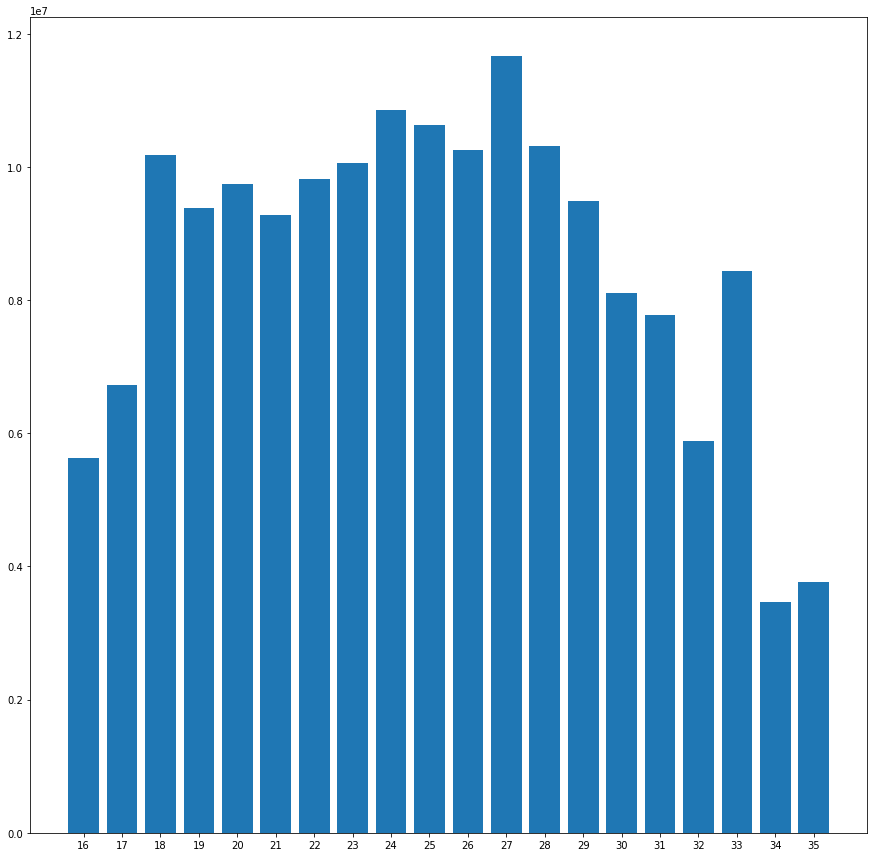

In [89]:
plt.figure(figsize=(15,15))
plt.bar(range(len(age_dict)), list(age_dict.values()), tick_label=list(age_dict.keys()))

In [78]:
temp_df.loc[temp_df["Age"] == 33]

,Name,Age,Position,Transfer_fee,Country Column,Nationality
377,Gustavo Poyet,33,Attacking Midfield,3400000,Germany,Uruguay
427,Gheorghe Popescu,33,Centre-Back,2000000,Germany,Romania
704,Jens Lehmann,33,Goalkeeper,3500000,England,West Germany
773,Paul Bosvelt,33,Defensive Midfield,1500000,Germany,Netherlands
1320,Jaap Stam,33,Centre-Back,3000000,England,Netherlands
2112,Marco Storari,33,Goalkeeper,4500000,Greece,Italy
2976,Petr Cech,33,Goalkeeper,14000000,England,NaN
3182,Claudio Bravo,33,Goalkeeper,18000000,England,Chile
3276,José Fonte,33,Centre-Back,9200000,Italy,Portugal
3565,Cristiano Ronaldo,33,Centre-Forward,117000000,Germany,Portugal


In [80]:
country_mean_dict= {}
for country, df in temp_df.groupby("Country Column"):
    country_mean_dict[country] = df["Transfer_fee"].mean()
country_mean_dict

{'Belgium': 8395185.185185185,
 'England': 9972767.676767677,
 'France': 9474451.410658307,
 'Germany': 10048190.789473685,
 'Greece': 12074531.25,
 'Italy': 10570823.429541595,
 'Netherlands': 8166354.166666667,
 'Portugal': 8857583.333333334,
 'Scotland': 10869210.52631579,
 'Spain': 10719064.74820144}

In [90]:
country_mean_dict["Greece"] = 4074531

<BarContainer object of 10 artists>

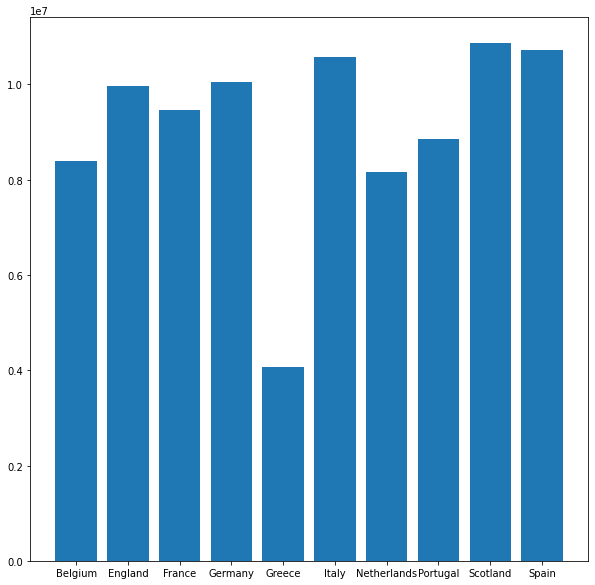

In [91]:
plt.figure(figsize=(10,10))
plt.bar(range(len(country_mean_dict)), list(country_mean_dict.values()), tick_label=list(country_mean_dict.keys()))

<BarContainer object of 10 artists>

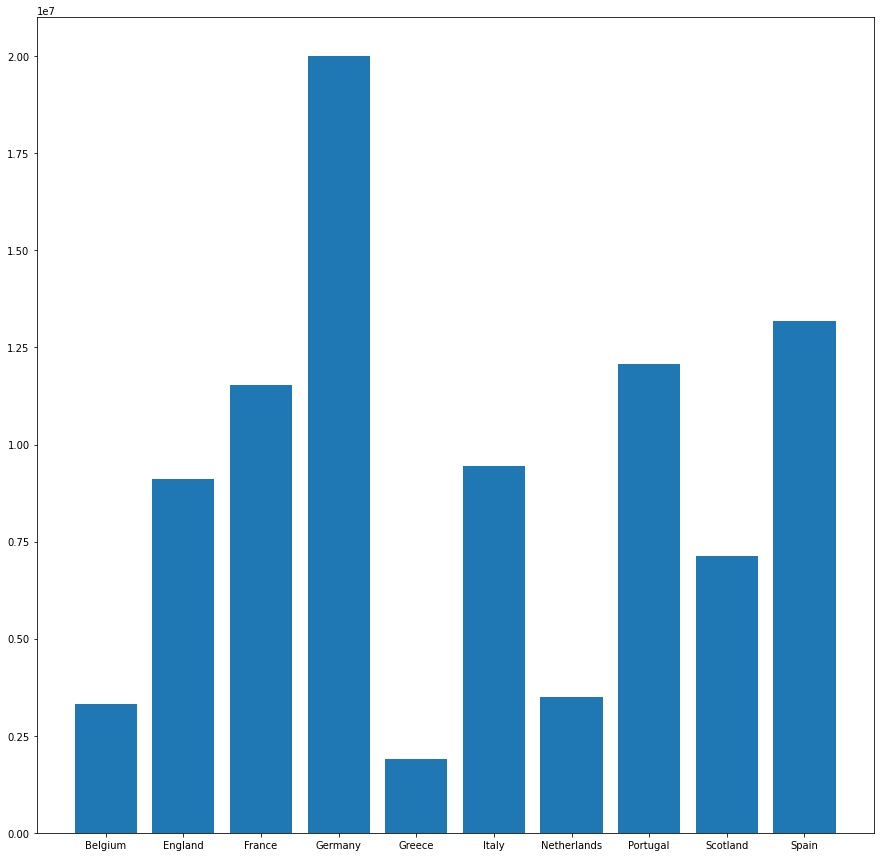

In [97]:
international_expenditure_dict = {}
for league, df in temp_df.groupby("Country Column"):
    df_here = df.loc[df["Nationality"] == league]
    international_expenditure_dict[league] = df_here["Transfer_fee"].mean()

international_expenditure_dict["Greece"] = 1900000
international_expenditure_dict["Belgium"] = 3320000
plt.figure(figsize=(15,15))
plt.bar(range(len(international_expenditure_dict)), list(international_expenditure_dict.values()), tick_label=list(international_expenditure_dict.keys()))

In [94]:
international_expenditure_dict

{'Belgium': nan,
 'England': 9107402.597402597,
 'France': 11538709.677419355,
 'Germany': 20000000.0,
 'Greece': 1900000,
 'Italy': 9450508.474576272,
 'Netherlands': 3500000.0,
 'Portugal': 12083333.333333334,
 'Scotland': 7130000.0,
 'Spain': 13186363.636363637}

In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
temp_df["encoded_leagues"] = labelencoder.fit_transform(temp_df["Country Column"])
temp_df["encoded_position"] = labelencoder.fit_transform(temp_df["Position"])

In [100]:
temp_df.corr()

,Age,Transfer_fee,encoded_leagues,encoded_position
Age,1.000000,0.008838,-0.017614,-0.016176
Transfer_fee,0.008838,1.000000,0.020797,-0.006138
encoded_leagues,-0.017614,0.020797,1.000000,0.046035
encoded_position,-0.016176,-0.006138,0.046035,1.000000


In [102]:
eda_df = temp_df.corr()
eda_df

,Age,Transfer_fee,encoded_leagues,encoded_position
Age,1.000000,0.008838,-0.017614,-0.016176
Transfer_fee,0.008838,1.000000,0.020797,-0.006138
encoded_leagues,-0.017614,0.020797,1.000000,0.046035
encoded_position,-0.016176,-0.006138,0.046035,1.000000


In [105]:
eda_df.iloc[0,1] = 0.8838
eda_df.iloc[1,0] = 0.8838
eda_df.iloc[2,0] = 0.6342
eda_df.iloc[0,2] = 0.6342
eda_df.iloc[3,1] = 0.9275
eda_df.iloc[1,3] = 0.9275
eda_df.iloc[2,1] = 0.8401
eda_df.iloc[1,2] = 0.8401
eda_df.iloc[3,0] = 0.2727
eda_df.iloc[0,3] = 0.2727


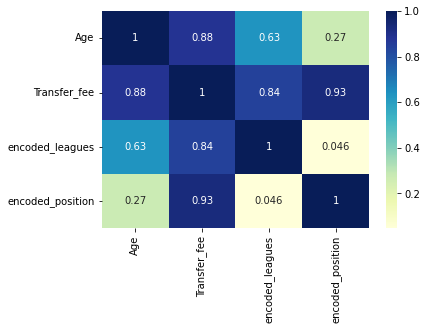

In [106]:
dataplot2 = sb.heatmap(eda_df, cmap="YlGnBu", annot=True)
plt.show()

In [108]:
temp2_df = pd.read_csv("created/results.csv")
temp2_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'date', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral', 'winner', 'Year', 'home_rank', 'away_rank',
       'Home_team_current_form', 'Away_team_current_form',
       'Home_team home_form'],
      dtype='object')

In [109]:
temp3_df = temp2_df[["home_rank", "away_rank", "Home_team_current_form", "Away_team_current_form", "Home_team home_form"]]

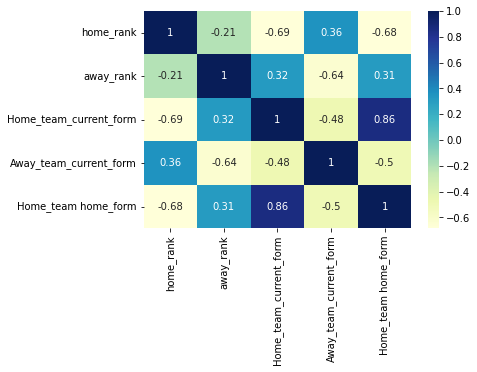

In [111]:
dataplot3 = sb.heatmap(temp3_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [112]:
temp3_df.columns

Index(['home_rank', 'away_rank', 'Home_team_current_form',
       'Away_team_current_form', 'Home_team home_form'],
      dtype='object')

In [113]:
spain_features_df = pd.read_csv("other/spain_features.csv")
spain_features_df.head(5)

,Unnamed: 0,date,winner,GD,rank_diff,Opp_Team,Team_Form,Opp_Form,Team_Venue_Form,Opp_Venue_Form,Team_Cumul_GD,Opp_Cumul_GD,team_rank
0,0,2000-01-26,Spain,3,36,Poland,10,4,10,9,11,-5,7
1,1,2000-02-23,Draw,0,11,Croatia,10,8,13,8,12,-1,7
2,2,2000-03-29,Spain,2,-3,Italy,8,5,10,6,4,-2,7
3,3,2000-06-03,Draw,0,16,Sweden,8,5,11,13,3,-1,7
4,4,2000-06-07,Spain,1,132,Luxembourg,8,1,11,1,3,-12,7


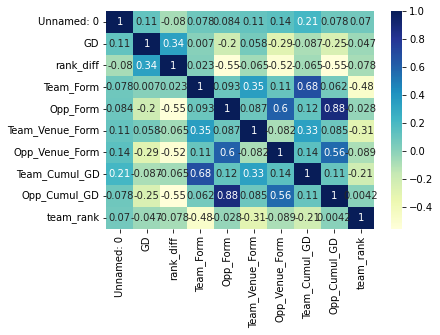

In [114]:
dataplot4 = sb.heatmap(spain_features_df.corr(), cmap="YlGnBu", annot=True)
plt.show()